In [18]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [40]:
df = pd.read_csv('A3EDA.csv')
df = df.drop(columns=['Unnamed: 0'])

df = df.dropna()
df = df[(df['Dates'] > 1800) & (df['Dates'] < 2000)]
df.head()

,srcs,Object categories,Support/medium,ID,Dates,Pixels,Saturation,Brightness,Edge,Grey Var,Unique Colors,Entropy Variance,New Color Calc
1,https://images.rkd.nl/rkd/thumb/650x650/de0a31...,ceiling painting,"Piet Mondriaan,\n ...",4.0,1900.0,326950,0.074096,0.727195,0.001988,0.037383,33366,3.573145,2293.737495
2,https://images.rkd.nl/rkd/thumb/650x650/379468...,painting,"canvas on panel, oil paint",6.0,1904.0,293800,0.225026,0.316344,0.002212,0.026967,49014,0.511348,2043.164370
3,https://images.rkd.nl/rkd/thumb/650x650/ca71c7...,drawing,"paper, charcoal",9.0,1906.0,265850,0.025212,0.826180,0.002422,0.020452,2128,1.475628,3054.787618
4,https://images.rkd.nl/rkd/thumb/650x650/b8b908...,painting,"canvas, oil paint",12.0,1907.0,347100,0.114233,0.624798,0.001873,0.013199,51044,0.551429,1401.718645
5,https://images.rkd.nl/rkd/thumb/650x650/20b4f5...,painting,"cardboard, oil paint",13.0,1903.0,305500,0.272426,0.497248,0.002128,0.029189,44727,0.643781,1938.653544


Text(0.5, 0, 'Edge Count')

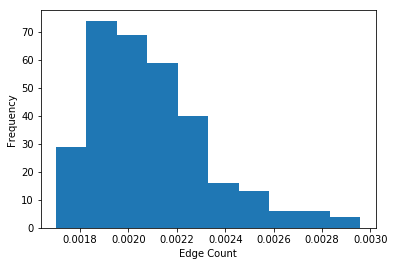

In [41]:
edgeplot2 = df['Edge'].plot(kind='hist')
edgeplot2.set_xlabel("Edge Count")

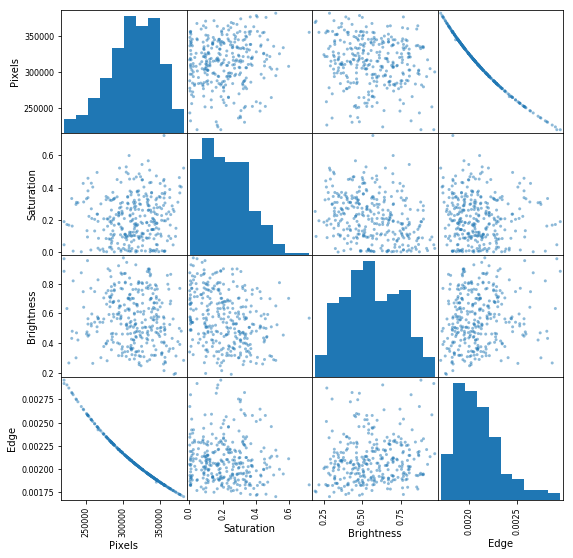

In [42]:
pd.plotting.scatter_matrix(df[['Pixels', 'Saturation', 'Brightness', 'Edge']], figsize = (9,9))
plt.show()

In [43]:
pca = PCA(n_components=2)
X = df[['Pixels', 'Saturation', 'Brightness', 'Edge', 'Grey Var', 'Unique Colors', 'Entropy Variance']]
principalComponents = pca.fit_transform(X)

In [44]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [45]:
df['pca-one'] = principalComponents[:,0]
df['pca-two'] = principalComponents[:,1] 
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.61917477 0.38082523]


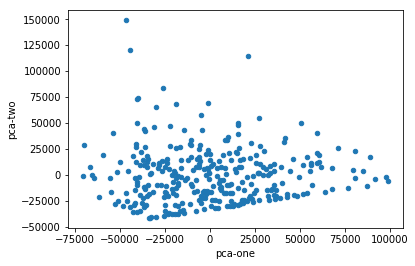

In [46]:
df[['pca-one', 'pca-two']].plot.scatter(0,1)

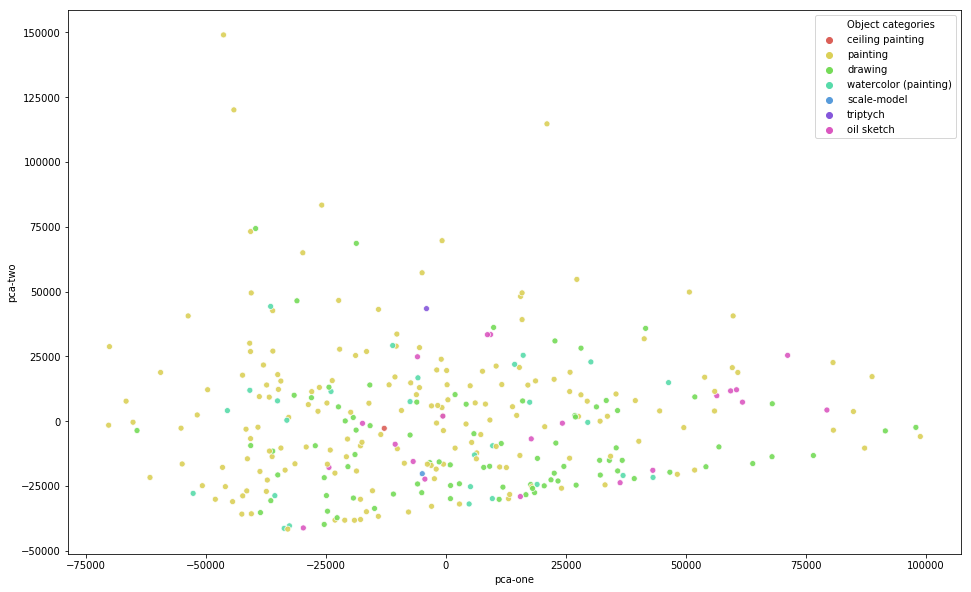

In [47]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="Object categories",
    palette=sns.color_palette("hls", len(df['Object categories'].unique())),
    data=df,
    legend="full",
    alpha=0.9
)

## Calculating new abstraction score

In [48]:
maxcolor = df['Unique Colors'].max()
maxedge = df['Edge'].max()
maxvar = df['Grey Var'].max()
maxent = df['Entropy Variance'].max()
maxnewcolor = df['New Color Calc'].max()

In [49]:
scores = []
scoresnew = []
for i in range(len(df)):
    color = list(df['Unique Colors'])[i]
    color = color/maxcolor
    
    newcolor = list(df['New Color Calc'])[i]
    newcolor = newcolor/maxnewcolor
    
    edge = list(df['Edge'])[i]
    edge = edge/maxedge
    
    variation = list(df['Grey Var'])[i]
    variation = variation/maxvar
    
    entvar = list(df['Entropy Variance'])[i]
    entvar = entvar / maxent
    
    score = color + edge + variation
    score = score/3
    
    newscore = newcolor + edge + entvar
    newscore = newscore/3
    scores.append(score)
    scoresnew.append(newscore)

In [50]:
df['scores'] = scores
df['new scores'] = scoresnew

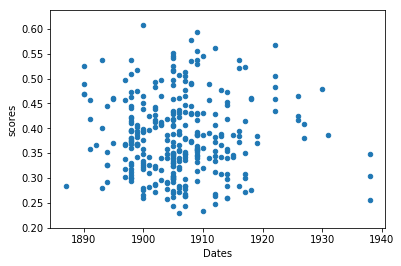

In [51]:
df.plot.scatter('Dates', 'scores')

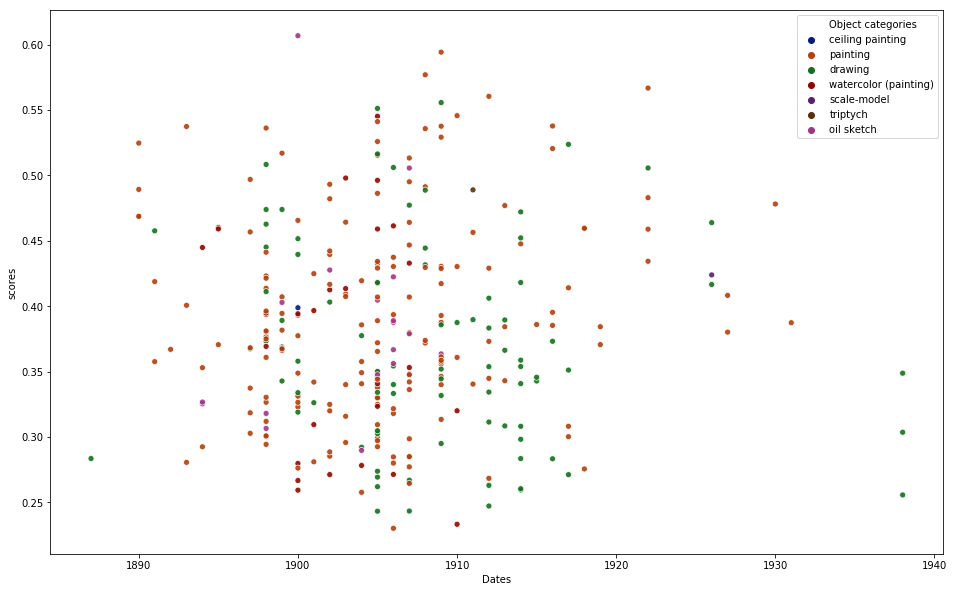

In [52]:
#original scores

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="Dates", y="scores",
    hue="Object categories",
    palette=sns.color_palette("dark", len(df['Object categories'].unique())),
    data=df,
    legend="full",
    alpha=0.9
)

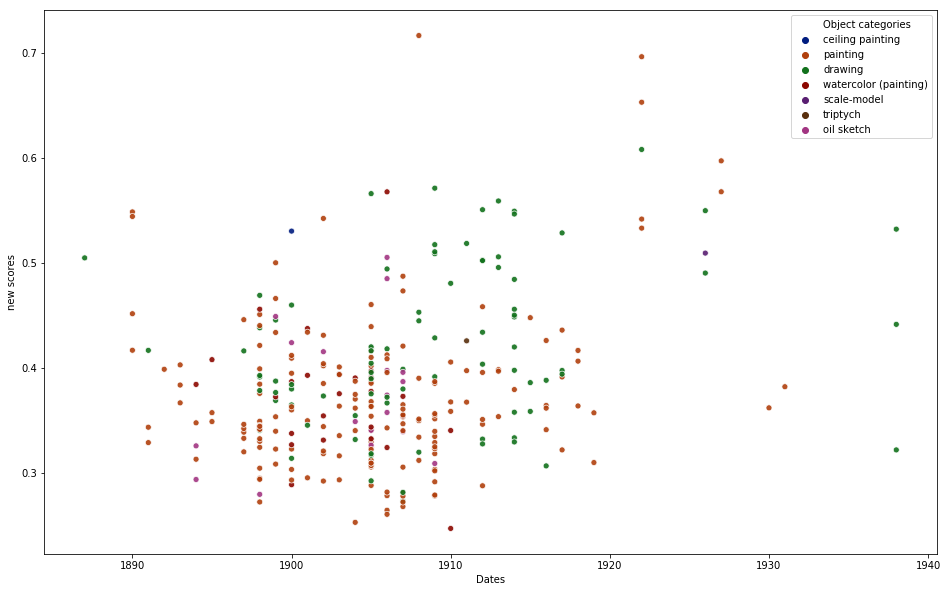

In [53]:
#new scores

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="Dates", y="new scores",
    hue="Object categories",
    palette=sns.color_palette('dark', len(df['Object categories'].unique())),
    data=df,
    legend="full",
    alpha=0.9
)

/Users/sruthi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


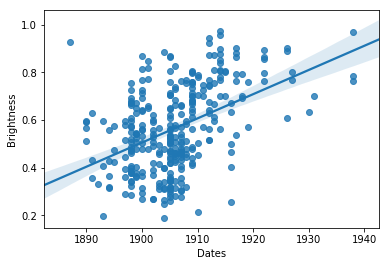

In [54]:
sns.regplot(df['Dates'],df['Brightness'])


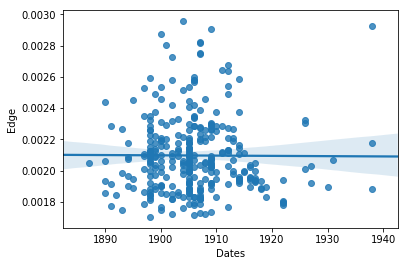

In [55]:
sns.regplot(df['Dates'],df['Edge'])


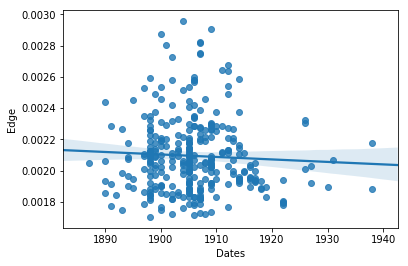

In [56]:
xdf = df.drop([103])
sns.regplot(xdf['Dates'], xdf['Edge'])

Text(0.5, 0, 'Years')

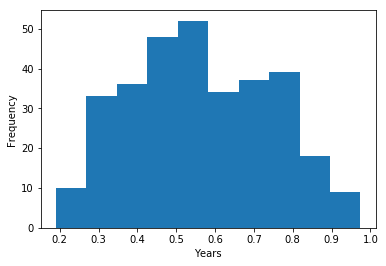

In [57]:
yearplot = df['Brightness'].plot(kind='hist')
yearplot.set_xlabel("Years")